# Sentiment Analysis terhadap Vaksinisasi COVID-19 di Indonesia: Data Exploration
<h2>Tim Yaudahlah</h2>


---

Kaenova Mahendra Auditama<sup>1</sup><br>
Fendi Irfan Amorokhman<sup>2</sup><br>
Ananda Affan Fattahila<sup>3</sup><br>
<sup>1</sup><a href="mailto:kaenova@student.telkomuniversity.ac.id">kaenova@student.telkomuniversity.ac.id</a><br>
<sup>2</sup><a href="mailto:fendiirfan@student.telkomuniversity.ac.id">fendiirfan@student.telkomuniversity.ac.id</a><br>
<sup>3</sup><a href="mailto:affanfattahila@student.telkomuniversity.ac.id">affanfattahila@student.telkomuniversity.ac.id</a><br>
Informatics Engineering, Telkom University, Indonesia<br>
2021


# Data Exploration
Dalam eksplorasi data kami hanya melihat 3 topik khusus, diantaranya:
Kata Kunci Utama: `Covid`, `Corona`, `COVID-19`, `COVID19`, `Vaksinasi`, `Vaksinisasi`, `Vaksin`  
1. Pendapat masyarakat Indonesia terhadap vaksin gratis dan murah atau berbayar.  
Kata Kunci: `Berbayar`, `Gratis`, `Bayar`, `Tanpa Biaya`, `Mahal`, `Murah`  
2. Pendapat masyarakat Indonesia tentang vaksin  Sinovac (CoronaVac), AstraZeneca yang diproduksi SK Bio, Sinopharm dan Pfizer.  
Kata Kunci: `Sinovac`, `AstraZenaca`, `Sinopharm`, `pfizer`   
3. Pendapat masyarakat Indonesia terhadap keefektifan vaksinasi di Indonesia
Kata Kunci: `Berguna`, `Bermanfaat`, `Berhasil`, `Menghidupkan`, `Gagal`, `Mematikan`, `"Tidak Berguna"`, `Merugikan`

Dan akan dilakukan klasifikasi sentimen terhadap pendapat-pendapat dari hasil data crawling di Twitter kami yang sudah dilakukan pra-pemrosesan.


# Import Library and Connecting to Google

In [30]:
!pip install matplotlib==3.4.2

In [31]:
# Connect to GEMASTIK XIV: Drive for modules
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Topik 1
Pendapat masyarakat Indonesia terhadap vaksin gratis dan murah atau mahal (berbiaya)

In [33]:
df_gratis   = pd.read_csv('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/data/exploration/gratis.csv')
df_berbiaya = pd.read_csv('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/data/exploration/berbiaya.csv')
df_berbiaya['cnn_lstm_predict'] = df_berbiaya['lstm_predict'].to_list()
df_gratis['cnn_lstm_predict'] = df_gratis['lstm_predict'].to_list()

In [34]:
df_gratis.head()

,Unnamed: 0,tweet,bert_predict,lstm_predict,bert_lstm_predict,cnn_lstm_predict
0,0,habis vaksin bro iya vaksin gratis beli biadab,1,1,1,1
1,1,kangen ibuk penjual nasi campur sebelah kosan ...,1,1,1,1
2,2,geh vaksin minimal th di ya yg gratis dmn baya...,1,1,1,1
3,3,dagang emang hemat china buktinya penyakit cor...,-1,1,-1,1
4,4,crazy rich beli lapak tenabang ikut vaksin gra...,1,1,1,1


In [35]:
df_berbiaya.head()

,Unnamed: 0,tweet,bert_predict,lstm_predict,bert_lstm_predict,cnn_lstm_predict
0,0,orang takut covidcovidin dibilang nyari untung...,-1,-1,-1,-1
1,1,klo vaksin modena pfizer bayar jg ga asal asur...,-1,-1,-1,-1
2,2,covid gak percaya pakai duit lu besok gue baya...,-1,-1,-1,-1
3,3,gimana kagak meningkat korban corona wong saki...,-1,-1,-1,-1
4,4,sebulan kerja udah dikeluaringadapet gaji ales...,-1,-1,-1,-1


### Gratis

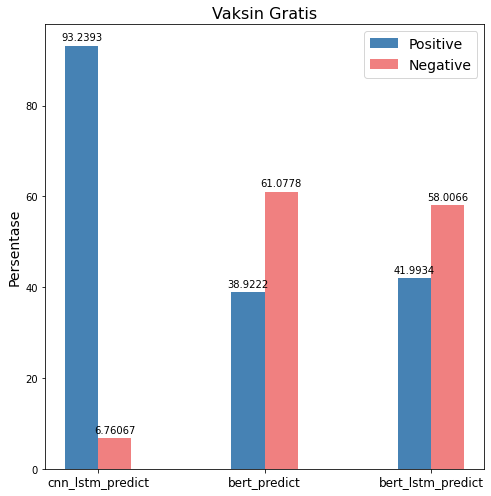

In [36]:
model = ['cnn_lstm_predict','bert_predict', 'bert_lstm_predict']

a = (df_gratis['cnn_lstm_predict'].value_counts()[1]/df_gratis['cnn_lstm_predict'].count())*100
b = (df_gratis['cnn_lstm_predict'].value_counts()[-1]/df_gratis['cnn_lstm_predict'].count())*100
c = (df_gratis['bert_predict'].value_counts()[1]/df_gratis['bert_predict'].count())*100
d = (df_gratis['bert_predict'].value_counts()[-1]/df_gratis['bert_predict'].count())*100
e = (df_gratis['bert_lstm_predict'].value_counts()[1]/df_gratis['bert_lstm_predict'].count())*100
f = (df_gratis['bert_lstm_predict'].value_counts()[-1]/df_gratis['bert_lstm_predict'].count())*100

positive = [a,c,e]
negative = [b,d,f]

x = np.arange(len(model))
width = 0.2

fig, ax = plt.subplots(figsize=(7, 7))

pos = ax.bar(x - width/2, positive, width, label='Positive', color='steelblue')
neg = ax.bar(x + width/2, negative, width, label='Negative', color='lightcoral')

ax.set_title('Vaksin Gratis', size=16)
ax.set_ylabel('Persentase', size=14)
ax.set_xticks(x)
ax.set_xticklabels(model, size=12)
ax.legend(fontsize=14)

ax.bar_label(pos, padding=3)
ax.bar_label(neg, padding=3)

fig.tight_layout()

plt.savefig('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/Laporan Gemastik/fig/gratis.jpg')
plt.show()

In [37]:
# Tampilkan jumlah label -1 pada prediksi lstm
print(len(df_gratis[df_gratis['cnn_lstm_predict'] == -1]))
# Tampilkan jumlah label -1 pada prediksi lstm ketika pada prediksi lainnya terlabel 1
print(len(list(df_gratis[(df_gratis['bert_predict'] == 1) & (df_gratis['bert_lstm_predict'] == 1) & (df_gratis['cnn_lstm_predict'] == -1)]['tweet'])))

# Artinya LSTM yakin membuat label -1 dan 1 tersebut. Tidak terlalu besar perbedaan saat melabelkan -1 pada prediksi lstm saat pada prediksi lainnya 1

350
27


In [38]:

print('Hipotesanya, pada LSTM tidak bisa melihat bias, ketika ada kata gratis akan dilabelkan 1')

print(len(list(df_gratis[df_gratis['lstm_predict'] == 1]['tweet'])))

list_temp = list(df_gratis[df_gratis['lstm_predict'] == 1]['tweet'])

jumlah_kata_gratis = 0

for i in range(len(list_temp)):
  split = list_temp[i].split(' ')
  if 'gratis' in split:
    jumlah_kata_gratis += 1

print(jumlah_kata_gratis)


print('Dengan jumlah yang mirip, bisa ditarik kesimpulan bahwa LSTM terbias dengan kata gratis, diartikan sentimen 1')


Hipotesanya, pada LSTM tidak bisa melihat bias, ketika ada kata gratis akan dilabelkan 1
4827
4811
Dengan jumlah yang mirip, bisa ditarik kesimpulan bahwa LSTM terbias dengan kata gratis, diartikan sentimen 1


### Berbiaya

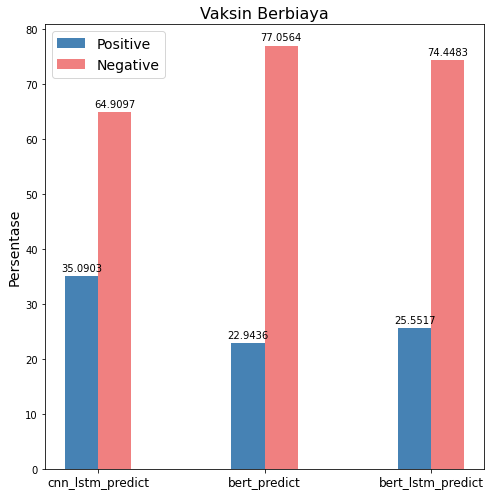

In [39]:
model = ['cnn_lstm_predict','bert_predict', 'bert_lstm_predict']

a = (df_berbiaya['cnn_lstm_predict'].value_counts()[1]/df_berbiaya['cnn_lstm_predict'].count())*100
b = (df_berbiaya['cnn_lstm_predict'].value_counts()[-1]/df_berbiaya['cnn_lstm_predict'].count())*100
c = (df_berbiaya['bert_predict'].value_counts()[1]/df_berbiaya['bert_predict'].count())*100
d = (df_berbiaya['bert_predict'].value_counts()[-1]/df_berbiaya['bert_predict'].count())*100
e = (df_berbiaya['bert_lstm_predict'].value_counts()[1]/df_berbiaya['bert_lstm_predict'].count())*100
f = (df_berbiaya['bert_lstm_predict'].value_counts()[-1]/df_berbiaya['bert_lstm_predict'].count())*100

positive = [a,c,e]
negative = [b,d,f]

x = np.arange(len(model))
width = 0.2

fig, ax = plt.subplots(figsize=(7, 7))

pos = ax.bar(x - width/2, positive, width, label='Positive', color='steelblue')
neg = ax.bar(x + width/2, negative, width, label='Negative', color='lightcoral')

ax.set_title('Vaksin Berbiaya', size=16)
ax.set_ylabel('Persentase', size=14)
ax.set_xticks(x)
ax.set_xticklabels(model, size=12)
ax.legend(fontsize=14)

ax.bar_label(pos, padding=3)
ax.bar_label(neg, padding=3)

fig.tight_layout()

plt.savefig('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/Laporan Gemastik/fig/berbiaya.jpg')
plt.show()

## Topik 2
Pendapat masyarakat Indonesia terhadap produk vaksin (Astrazenaca, Pfizer, Sinopharm, Sinovac)

In [40]:
df_astrazenaca  = pd.read_csv('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/data/exploration/astrazenaca.csv')
df_pfizer       = pd.read_csv('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/data/exploration/pfizer.csv')
df_sinopharm    = pd.read_csv('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/data/exploration/sinopharm.csv')
df_sinovac      = pd.read_csv('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/data/exploration/sinovac.csv')

df_astrazenaca['cnn_lstm_predict'] = df_astrazenaca['lstm_predict'].to_list()
df_pfizer['cnn_lstm_predict'] = df_pfizer['lstm_predict'].to_list()
df_sinopharm['cnn_lstm_predict'] = df_sinopharm['lstm_predict'].to_list()
df_sinovac['cnn_lstm_predict'] = df_sinovac['lstm_predict'].to_list()

In [41]:
df_astrazenaca.head()

,Unnamed: 0,tweet,bert_predict,lstm_predict,bert_lstm_predict,cnn_lstm_predict
0,0,bismillahirrahmanirrahim hari inshaa allah per...,1,-1,1,-1
1,1,temenku seminggu lalu udah vaksin astrazeneca ...,1,-1,-1,-1
2,2,seminggu denger alesan orang gak vaksin berser...,-1,-1,-1,-1
3,3,sejauh yg dirasakan vaksin astrazeneca kemarin...,1,1,-1,1
4,4,nuko umugabo umwe funga boutique ubanze uge kw...,1,-1,-1,-1


In [42]:
df_pfizer.head()

,Unnamed: 0,tweet,bert_predict,lstm_predict,bert_lstm_predict,cnn_lstm_predict
0,0,kita pakenya vaksin astra ya bebeb divaksin pf...,-1,-1,-1,-1
1,1,kayak bener kata kakakku pfizer moderna kayak ...,-1,-1,-1,-1
2,2,dah dah tarikh vaksin pfizer,-1,-1,-1,-1
3,3,badan mmg serap betul vaksin hari tangan kiri ...,-1,-1,-1,-1
4,4,sengajasih ngga ngebet banget cari vaksin nung...,-1,-1,-1,-1


In [43]:
df_sinopharm.head()

,Unnamed: 0,tweet,bert_predict,lstm_predict,bert_lstm_predict,cnn_lstm_predict
0,0,udh vaksin sinovac eh sinopharm dah muncul,-1,-1,-1,-1
1,1,ad yg vaksin pake sinopharm ga efektivitas gmn...,-1,-1,-1,-1
2,2,semoga besok vaksin sinopharm amin sampe astra...,-1,-1,-1,-1
3,3,kayak bener kata kakakku pfizer moderna kayak ...,-1,-1,-1,-1
4,4,vaksin sinopharm teh ga dikasih pemerintah ya,-1,-1,-1,-1


In [44]:
df_sinovac.head()

,Unnamed: 0,tweet,bert_predict,lstm_predict,bert_lstm_predict,cnn_lstm_predict
0,0,gatau emang beda imun beda vaksin beda ketahan...,-1,-1,-1,-1
1,1,kalo ke luar negeri sinovac gaberlaku di serti...,-1,-1,-1,-1
2,2,selamat pagi penanti vaksin sinovac,1,1,1,1
3,3,jam vaksin sinovac efek sampingnya laper,-1,-1,-1,-1
4,4,bismillah semoga ga kena vaksin sinovac vaksin...,1,1,1,1


### Astrazenaca

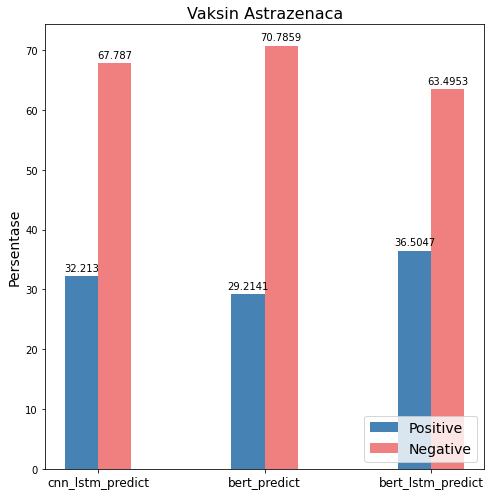

In [45]:
model = ['cnn_lstm_predict','bert_predict', 'bert_lstm_predict']

a = (df_astrazenaca['cnn_lstm_predict'].value_counts()[1]/df_astrazenaca['cnn_lstm_predict'].count())*100
b = (df_astrazenaca['cnn_lstm_predict'].value_counts()[-1]/df_astrazenaca['cnn_lstm_predict'].count())*100
c = (df_astrazenaca['bert_predict'].value_counts()[1]/df_astrazenaca['bert_predict'].count())*100
d = (df_astrazenaca['bert_predict'].value_counts()[-1]/df_astrazenaca['bert_predict'].count())*100
e = (df_astrazenaca['bert_lstm_predict'].value_counts()[1]/df_astrazenaca['bert_lstm_predict'].count())*100
f = (df_astrazenaca['bert_lstm_predict'].value_counts()[-1]/df_astrazenaca['bert_lstm_predict'].count())*100

positive = [a,c,e]
negative = [b,d,f]

x = np.arange(len(model))
width = 0.2

fig, ax = plt.subplots(figsize=(7, 7))

pos = ax.bar(x - width/2, positive, width, label='Positive', color='steelblue')
neg = ax.bar(x + width/2, negative, width, label='Negative', color='lightcoral')

ax.set_title('Vaksin Astrazenaca', size=16)
ax.set_ylabel('Persentase', size=14)
ax.set_xticks(x)
ax.set_xticklabels(model, size=12)
ax.legend(fontsize=14, loc='lower right')

ax.bar_label(pos, padding=3)
ax.bar_label(neg, padding=3)

fig.tight_layout()

plt.savefig('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/Laporan Gemastik/fig/astrazenaca.jpg')
plt.show()

### Pfizer

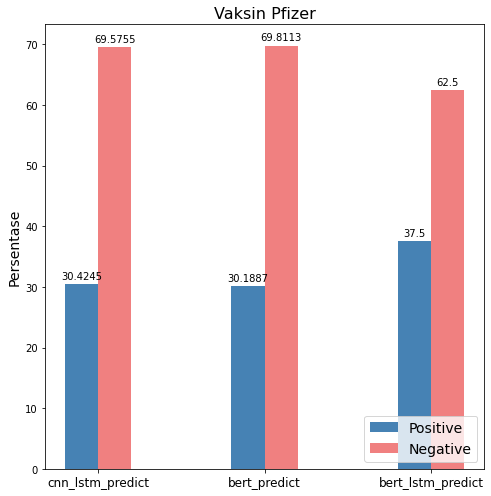

In [46]:
model = ['cnn_lstm_predict','bert_predict', 'bert_lstm_predict']

a = (df_pfizer['cnn_lstm_predict'].value_counts()[1]/df_pfizer['cnn_lstm_predict'].count())*100
b = (df_pfizer['cnn_lstm_predict'].value_counts()[-1]/df_pfizer['cnn_lstm_predict'].count())*100
c = (df_pfizer['bert_predict'].value_counts()[1]/df_pfizer['bert_predict'].count())*100
d = (df_pfizer['bert_predict'].value_counts()[-1]/df_pfizer['bert_predict'].count())*100
e = (df_pfizer['bert_lstm_predict'].value_counts()[1]/df_pfizer['bert_lstm_predict'].count())*100
f = (df_pfizer['bert_lstm_predict'].value_counts()[-1]/df_pfizer['bert_lstm_predict'].count())*100

positive = [a,c,e]
negative = [b,d,f]

x = np.arange(len(model))
width = 0.2

fig, ax = plt.subplots(figsize=(7, 7))

pos = ax.bar(x - width/2, positive, width, label='Positive', color='steelblue')
neg = ax.bar(x + width/2, negative, width, label='Negative', color='lightcoral')

ax.set_title('Vaksin Pfizer', size=16)
ax.set_ylabel('Persentase', size=14)
ax.set_xticks(x)
ax.set_xticklabels(model, size=12)
ax.legend(fontsize=14, loc='lower right')

ax.bar_label(pos, padding=3)
ax.bar_label(neg, padding=3)

fig.tight_layout()

plt.savefig('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/Laporan Gemastik/fig/pfizer.jpg')
plt.show()

#### Sinopharm

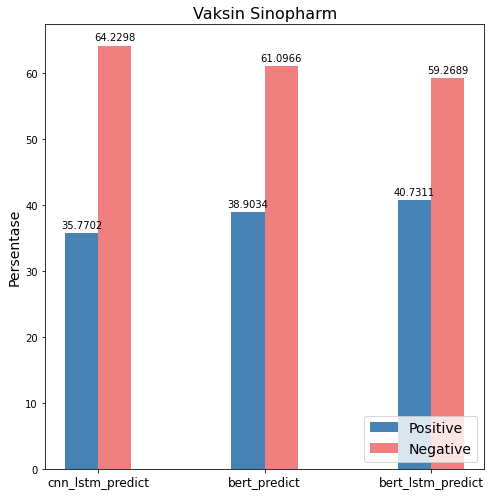

In [47]:
model = ['cnn_lstm_predict','bert_predict', 'bert_lstm_predict']

a = (df_sinopharm['cnn_lstm_predict'].value_counts()[1]/df_sinopharm['cnn_lstm_predict'].count())*100
b = (df_sinopharm['cnn_lstm_predict'].value_counts()[-1]/df_sinopharm['cnn_lstm_predict'].count())*100
c = (df_sinopharm['bert_predict'].value_counts()[1]/df_sinopharm['bert_predict'].count())*100
d = (df_sinopharm['bert_predict'].value_counts()[-1]/df_sinopharm['bert_predict'].count())*100
e = (df_sinopharm['bert_lstm_predict'].value_counts()[1]/df_sinopharm['bert_lstm_predict'].count())*100
f = (df_sinopharm['bert_lstm_predict'].value_counts()[-1]/df_sinopharm['bert_lstm_predict'].count())*100

positive = [a,c,e]
negative = [b,d,f]

x = np.arange(len(model))
width = 0.2

fig, ax = plt.subplots(figsize=(7, 7))

pos = ax.bar(x - width/2, positive, width, label='Positive', color='steelblue')
neg = ax.bar(x + width/2, negative, width, label='Negative', color='lightcoral')

ax.set_title('Vaksin Sinopharm', size=16)
ax.set_ylabel('Persentase', size=14)
ax.set_xticks(x)
ax.set_xticklabels(model, size=12)
ax.legend(fontsize=14,loc='lower right')

ax.bar_label(pos, padding=3)
ax.bar_label(neg, padding=3)

fig.tight_layout()

plt.savefig('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/Laporan Gemastik/fig/sinopharm.png')
plt.show()

#### Sinovac

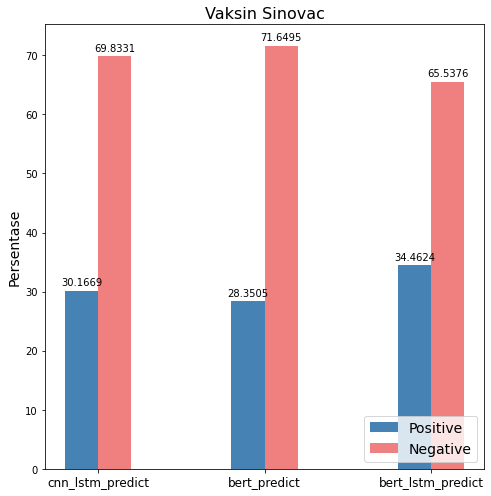

In [48]:
model = ['cnn_lstm_predict','bert_predict', 'bert_lstm_predict']

a = (df_sinovac['cnn_lstm_predict'].value_counts()[1]/df_sinovac['cnn_lstm_predict'].count())*100
b = (df_sinovac['cnn_lstm_predict'].value_counts()[-1]/df_sinovac['cnn_lstm_predict'].count())*100
c = (df_sinovac['bert_predict'].value_counts()[1]/df_sinovac['bert_predict'].count())*100
d = (df_sinovac['bert_predict'].value_counts()[-1]/df_sinovac['bert_predict'].count())*100
e = (df_sinovac['bert_lstm_predict'].value_counts()[1]/df_sinovac['bert_lstm_predict'].count())*100
f = (df_sinovac['bert_lstm_predict'].value_counts()[-1]/df_sinovac['bert_lstm_predict'].count())*100

positive = [a,c,e]
negative = [b,d,f]

x = np.arange(len(model))
width = 0.2

fig, ax = plt.subplots(figsize=(7, 7))

pos = ax.bar(x - width/2, positive, width, label='Positive', color='steelblue')
neg = ax.bar(x + width/2, negative, width, label='Negative', color='lightcoral')

ax.set_title('Vaksin Sinovac', size=16)
ax.set_ylabel('Persentase', size=14)
ax.set_xticks(x)
ax.set_xticklabels(model, size=12)
ax.legend(fontsize=14, loc='lower right')

ax.bar_label(pos, padding=3)
ax.bar_label(neg, padding=3)

fig.tight_layout()

plt.savefig('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/Laporan Gemastik/fig/sinovac.jpg')
plt.show()

## Topik 3
Pendapat masyarakat Indonesia terhadap keefektifan vaksinasi di Indonesia

In [54]:
df_berhasil = pd.read_csv('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/data/exploration/berhasil.csv')
df_gagal    = pd.read_csv('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/data/exploration/merugikan.csv')
df_pendapat = pd.concat([df_berhasil, df_gagal], ignore_index = True)
df_pendapat['cnn_lstm_predict'] = df_pendapat['lstm_predict'].to_list()

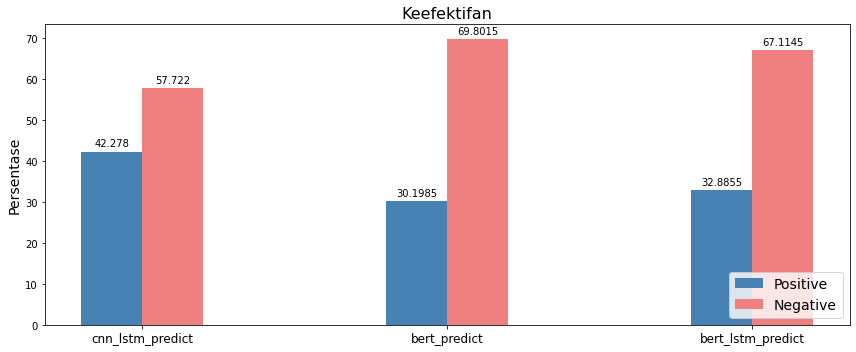

In [55]:
model = ['cnn_lstm_predict','bert_predict', 'bert_lstm_predict']

a = (df_pendapat['cnn_lstm_predict'].value_counts()[1]/df_pendapat['bert_predict'].count())*100
b = (df_pendapat['cnn_lstm_predict'].value_counts()[-1]/df_pendapat['bert_predict'].count())*100
c = (df_pendapat['bert_predict'].value_counts()[1]/df_pendapat['bert_predict'].count())*100
d = (df_pendapat['bert_predict'].value_counts()[-1]/df_pendapat['bert_predict'].count())*100
e = (df_pendapat['bert_lstm_predict'].value_counts()[1]/df_pendapat['bert_lstm_predict'].count())*100
f = (df_pendapat['bert_lstm_predict'].value_counts()[-1]/df_pendapat['bert_lstm_predict'].count())*100
positive = [a,c,e]
negative = [b,d,f]

x = np.arange(len(model))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 5))

pos = ax.bar(x - width/2, positive, width, label='Positive', color='steelblue')
neg = ax.bar(x + width/2, negative, width, label='Negative', color='lightcoral')

ax.set_title('Keefektifan', size=16)
ax.set_ylabel('Persentase', size=14)
ax.set_xticks(x)
ax.set_xticklabels(model, size=12)
ax.legend(fontsize=14, loc='lower right')

ax.bar_label(pos, padding=3)
ax.bar_label(neg, padding=3)

fig.tight_layout()

plt.savefig('/content/drive/Shareddrives/GEMASTIK XIV: Yaudahlah/Laporan Gemastik/fig/pendapat.jpg')
plt.show()

# Kode Tambahan